In [16]:
import xml.etree.ElementTree as ET


def xml_read(xml_path):
    xml_path = str(xml_path)

    def read_content(xml_file: str):

        tree = ET.parse(xml_file)
        root = tree.getroot()

        list_with_all_boxes = []

        for boxes in root.iter('object'):

            filename = root.find('filename').text

            ymin, xmin, ymax, xmax = None, None, None, None

            ymin = int(boxes.find("bndbox/ymin").text)
            xmin = int(boxes.find("bndbox/xmin").text)
            ymax = int(boxes.find("bndbox/ymax").text)
            xmax = int(boxes.find("bndbox/xmax").text)

            list_with_single_boxes = [xmin, ymin, xmax, ymax]
            list_with_all_boxes.append(list_with_single_boxes)

        return filename, list_with_all_boxes

    name, boxes = read_content(xml_path)

    
    global x_min
    global y_min
    global x_max
    global y_max
    x_min = boxes[0][0]
    y_min = boxes[0][1]
    x_max = boxes[0][2]
    y_max = boxes[0][3]

In [21]:
def img_read(img_path):
    img_path = str(img_path)
    #load image and draw
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from PIL import Image

    im = Image.open(img_path)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(im)

    # Create a Rectangle patch
    rect = patches.Rectangle((x_min, y_min), y_max, x_max, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.show()

images_xml\frame_vid_0_1005.xml
images_xml\frame_vid_0_1005.jpg


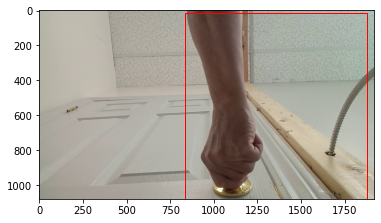

images_xml\frame_vid_0_1020.xml
images_xml\frame_vid_0_1020.jpg


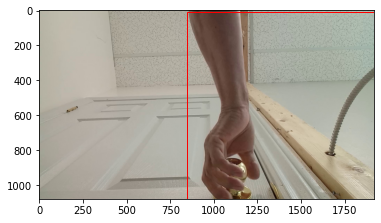

images_xml\frame_vid_0_1050.xml
images_xml\frame_vid_0_1050.jpg


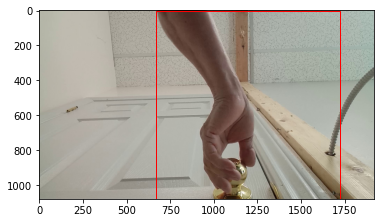

images_xml\frame_vid_0_1100.xml
images_xml\frame_vid_0_1100.jpg


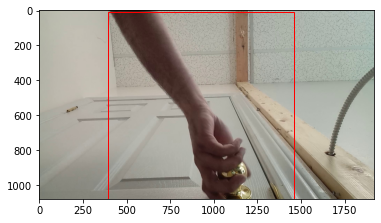

images_xml\frame_vid_0_1105.xml
images_xml\frame_vid_0_1105.jpg


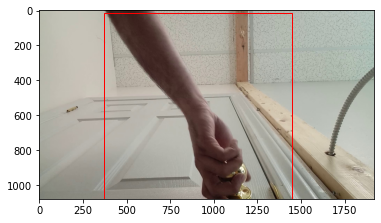

images_xml\frame_vid_0_1150.xml
images_xml\frame_vid_0_1150.jpg


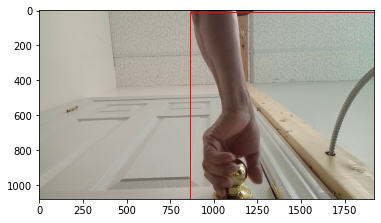

In [ ]:
import glob
import os
#for filename in glob.glob('images_xml/*.xml'):
for filename, img in zip(glob.glob('images_xml/*.xml'), glob.glob('images_xml/*.jpg')):
    print(filename)
    print(img)
    xml_read(filename)
    img_read(img)
    
    #xml_renamer(filename)
    
    
      # do your stuff

In [23]:
img

'images_xml\\frame_vid_0_1200.jpg'